## Pathways on PIRM selected genes vs randomly selected genes

In [1]:
import regex as re
import random
import requests
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from PIRM.PIRMDiscovery import CT_From_Table, Discovery
to_name = pd.read_csv('translator.csv').set_index('gene_num')['gene_name'].to_dict()
to_ensembl = pd.read_csv('translator.csv').set_index('gene_name')['gene_num'].to_dict()
with open('genes.txt', 'r') as file:
    our_genes = pd.read_csv('our_genes.csv')['Unnamed: 0'].tolist()
    all_genes = [string.strip() for string in file.readlines()]
    all_genes = [to_ensembl[x] for x in all_genes if to_ensembl[x] in our_genes]
counts = np.log1p(pd.read_csv("pe-rna.counts.txt", index_col=0))
counts = counts.loc[all_genes,:]
meta = pd.read_csv("pe-rna-metadata.csv", header=None, names=["sample", "classification"])
mild = counts[meta.loc[meta['classification'] == 'Mild', 'sample'].tolist()]
severe = counts[meta.loc[meta['classification'] == 'Severe', 'sample'].tolist()]
control = counts[meta.loc[meta['classification'] == 'Control', 'sample'].tolist()]

We are using the counts for the 37 RNA samples we have. However rather than using the many genes that we have in our database, only the 77 genes that were identified in papers

In [2]:
mild

,PL1015,PL1023,PL1043,PL1362,PL1627,PL1932,PL2195,PL2291,PL2338,PL2353,PL687,PL808,PL810
ENSG00000213741,8.135347,9.229894,9.534523,9.049819,8.491465,8.340695,8.644002,7.257925,9.128479,9.832529,9.381601,9.373224,8.905731
ENSG00000156508,11.462379,12.842304,12.799694,12.011991,11.998764,12.009177,12.837370,11.361976,12.512010,12.980988,12.593443,13.154979,12.371195
ENSG00000167244,9.230241,10.410396,9.392912,8.696845,10.120975,9.997843,9.818637,9.320808,10.934428,10.211854,8.751791,10.203444,10.171719
ENSG00000150991,9.422625,10.644615,10.225535,10.041247,9.991544,9.819454,10.964450,8.963160,10.506382,10.740757,10.520321,10.927125,10.202258
ENSG00000149806,8.407601,10.009648,10.112167,9.181941,9.649434,9.047939,9.777187,8.483222,9.799570,10.331985,10.090216,10.551324,9.711661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000159640,5.337538,5.402677,6.232448,5.379897,0.000000,6.418365,5.476464,2.639057,7.771067,0.000000,0.000000,6.572283,4.615121
ENSG00000130203,4.820282,4.787492,6.139885,6.156979,6.908755,6.609349,6.028279,4.779123,6.858565,6.660575,6.586172,6.383507,5.993961
ENSG00000143819,4.060443,0.000000,6.450472,6.423247,0.000000,0.000000,6.274762,4.442639,0.000000,6.222576,5.579730,5.497168,0.000000
ENSG00000232810,4.644391,4.532599,6.480045,5.318120,6.565265,0.000000,0.000000,4.919981,5.262690,6.701960,0.000000,5.564520,2.708050


In [3]:
severe

,PL1226,PL1383,PL1493,PL1720,PL1949,PL1962,PL2102,PL2169,PL2209,PL2360,PL2406,PL475,PL519,PL629,PL893
ENSG00000213741,9.376442,8.789051,9.019761,8.930891,9.760367,9.518413,9.239025,8.933796,9.299385,9.743222,9.550164,9.359952,8.670944,8.232972,9.459230
ENSG00000156508,12.709605,12.302857,12.713315,13.054143,13.220321,12.959436,13.230498,12.737877,12.812620,13.140993,13.013849,12.336670,11.855785,11.738759,12.421758
ENSG00000167244,9.463120,10.233295,9.615672,10.013731,10.825800,9.185266,10.461788,10.739522,9.977945,9.476926,9.688808,9.787459,8.963416,10.138994,9.555702
ENSG00000150991,10.465786,10.444124,10.562587,10.608217,10.802713,10.685309,10.880836,10.631664,10.382234,11.025588,11.097486,10.653511,9.857129,9.505916,9.728181
ENSG00000149806,10.053888,9.326967,9.597845,10.027915,10.436026,10.301525,10.325646,9.962605,9.629971,10.400924,9.986621,9.813508,9.281358,8.737613,9.677653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000159640,0.000000,8.014336,0.000000,0.000000,3.178054,6.782192,5.257495,5.814131,0.000000,4.262680,6.975414,6.230481,0.000000,5.181784,5.908083
ENSG00000130203,5.204007,5.332719,6.463029,6.612041,5.683580,5.700444,7.210080,6.095825,0.000000,5.690359,0.000000,5.680173,4.330733,5.891644,5.958425
ENSG00000143819,3.951244,5.883322,4.477337,5.627621,0.000000,7.109062,6.873164,0.000000,0.000000,5.752573,0.000000,0.000000,4.262680,4.189655,5.308268
ENSG00000232810,4.948760,4.276666,5.497168,6.391917,6.453625,0.000000,6.498282,5.030438,6.760415,5.583496,6.109248,3.663562,1.098612,0.000000,4.691348


In [4]:
control

,PL1013,PL1159,PL1182,PL1365,PL1506,PL1618,PL1626,PL1648,PL1755
ENSG00000213741,9.073145,9.115480,8.322151,8.565793,7.931285,8.387995,7.576097,8.456168,8.180881
ENSG00000156508,12.409879,12.148532,12.134368,11.687065,11.220334,11.634045,11.943729,11.652855,11.691798
ENSG00000167244,10.336406,9.100972,10.404263,9.644328,8.609225,9.433644,9.289614,9.011157,8.631236
ENSG00000150991,9.726691,10.163349,10.247680,9.954608,8.386173,9.070043,9.096275,10.241530,9.446834
ENSG00000149806,9.953515,9.944342,9.017241,8.977651,9.134431,8.941415,10.158479,9.350363,9.695602
...,...,...,...,...,...,...,...,...,...
ENSG00000159640,0.693147,6.957497,0.000000,0.000000,5.733341,0.000000,0.000000,0.000000,0.000000
ENSG00000130203,4.682131,0.000000,0.000000,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
ENSG00000143819,3.871201,6.156979,3.784190,5.298317,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000232810,5.416100,0.000000,6.871091,0.000000,6.907755,0.000000,0.000000,0.000000,0.000000


The `pathways_in_common` takes 2 genes, tests what the top pathways are from pathway commons, and returns them. If both selected genes do not have pathways recognized by pathway commons it returns -1

In [5]:
def pathways_in_common(gene1, gene2):
    pattern = r'"name":"(.*?)","dataSource":'
    gene_1_pathways = re.findall(pattern, requests.get("https://www.pathwaycommons.org/pc2/top_pathways?q="+to_name[gene1]).text)
    gene_2_pathways = re.findall(pattern, requests.get("https://www.pathwaycommons.org/pc2/top_pathways?q="+to_name[gene2]).text)
    if gene_1_pathways == [] and gene_2_pathways == []:
        return -1
    return [value for value in gene_1_pathways if value in gene_2_pathways]

To test how well this works, lets look at the graph of all gene pathways
![pathways](graph.png "Pathways")
The colorful arrows represent genetic enhancers, etc. The black ones represent shared pathways. We see that LEP and CSF1 should share one pathway. Do they?

In [6]:
pathways_in_common(to_ensembl['CSF1'],to_ensembl['IGF1'])

['Integrins in angiogenesis']

It works! We see that GSTM1 and GSTP1 share multiple pathways. Do they?

In [7]:
pathways_in_common(to_ensembl['GSTM1'],to_ensembl['GSTP1'])

['Metabolism of xenobiotics by cytochrome P450',
 'Drug metabolism - cytochrome P450']

RPL17 and RPL23 share a ton of pathways. Does the function report this? 

In [8]:
pathways_in_common(to_ensembl['RPL17'],to_ensembl['RPL23'])

['Protein Synthesis: Glutamic Acid',
 'Protein Synthesis: Isoleucine',
 'Protein Synthesis: Serine',
 'Protein Synthesis: Threonine',
 'Protein Synthesis: Valine',
 'Protein Synthesis: Alanine',
 'Protein Synthesis: Tryptophan',
 'Protein Synthesis: Tyrosine',
 'Protein Synthesis: Aspartic Acid',
 'Protein Synthesis: Methionine',
 'Protein Synthesis: Phenylalanine',
 'Protein Synthesis: Leucine',
 'Protein Synthesis: Asparagine',
 'Protein Synthesis: Glutamine',
 'Protein Synthesis: Glycine',
 'Protein Synthesis: Cysteine',
 'Protein Synthesis: Arginine',
 'Protein Synthesis: Lysine',
 'Protein Synthesis: Histidine',
 'Protein Synthesis: Proline']

C1QA and HK2 should have nothing in common

In [9]:
pathways_in_common(to_ensembl['C1QA'],to_ensembl['HK2'])

[]

So the function looks like it works. The following function reports the `top_n` best PIRM pairs

In [10]:
def PIRM_pairs(case, control, top_n):
    ct_case = CT_From_Table(sample_ids = case.columns, group_label = 'case',  table=case.T)
    ct_ctrl = CT_From_Table(sample_ids = control.columns, group_label = 'control',  table=control.T)
    d = Discovery(ct_case, ct_ctrl)
    d.test_all_combos()
    d.filter_results()
    best_pairs = d.best_pairs[:top_n]
    return np.array(best_pairs[['x', 'y', 'mcc']].values)

Now we have a function that makes random pairs

In [11]:
def random_pairs(top_n):
    pairs = []
    for _ in range(top_n):
        pairs.append(random.sample(all_genes,2))
    return pairs

In [12]:
def pathway_lengths(pair_set):
    p = []
    for combo in pair_set:
        c = combo[:2]
        if len(combo) == 3:
            acc = combo[2]
        pathways = pathways_in_common(*c)
        if pathways == -1:
            pathway_val = -1
        else:
            pathway_val = len(pathways)
        if len(combo) == 3:
            p.append((pathway_val, acc))
        else:
            p.append(pathway_val)
    return p

Now we have the top 50 pairs selected by PIRM for all three cohorts, as well as 50 random pairs

In [13]:
n = 50
mild_control = pathway_lengths(PIRM_pairs(mild, control, n))
severe_control = pathway_lengths(PIRM_pairs(severe, control, n))
severe_mild = pathway_lengths(PIRM_pairs(severe, mild, n))
random = pathway_lengths(random_pairs(n))

/home/punky/Documents/PE_graphing/PIRM/PIRMDiscovery.py:471: RuntimeWarning: invalid value encountered in divide
  mcc = ((tn*tp)-(fp*fn))/(((tn+fn)*(fp+tp)*(tn+fp)*(fn+tp))**.5)
/home/punky/Documents/PE_graphing/PIRM/PIRMDiscovery.py:471: RuntimeWarning: invalid value encountered in divide
  mcc = ((tn*tp)-(fp*fn))/(((tn+fn)*(fp+tp)*(tn+fp)*(fn+tp))**.5)
/home/punky/Documents/PE_graphing/PIRM/PIRMDiscovery.py:471: RuntimeWarning: invalid value encountered in divide
  mcc = ((tn*tp)-(fp*fn))/(((tn+fn)*(fp+tp)*(tn+fp)*(fn+tp))**.5)


In [14]:
print(mild_control)
print(severe_control)
print(severe_mild)
print(random)

[(0, 1.0), (0, 1.0), (0, 1.0), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9114654303752999), (0, 0.9085135251589959), (0, 0.9085135251589959), (1, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (20, 0.9085135251589959), (0, 0.9085135251589959), (2, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (1, 0.9085135251589959), (20, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (20, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251589959), (0, 0.9085135251

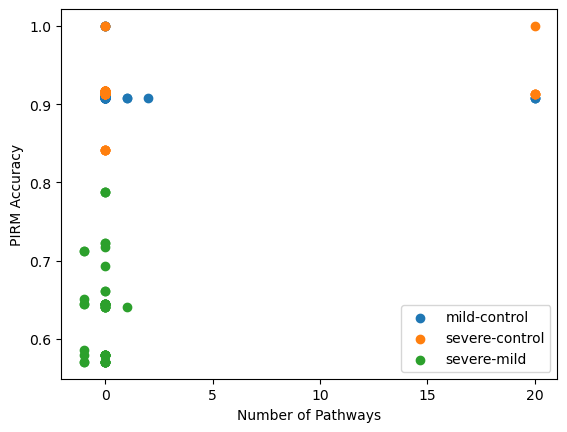

In [15]:
x, y = list(zip(*mild_control))
plt.scatter(x,y, label = 'mild-control')
x, y = list(zip(*severe_control))
plt.scatter(x,y,label = 'severe-control')
x, y = list(zip(*severe_mild))
plt.scatter(x,y,label = 'severe-mild')
plt.legend()
plt.xlabel('Number of Pathways')
plt.ylabel('PIRM Accuracy')
plt.show()

The reason that there is a cap at 20 is because pathwaycommons will not report more than 20 pathways in common via the api. All genes that have 20 pathways in common are ribosomal genes